---
#  Analyse Approfondie des Données de Pourboire
*Elaboré par: "Alloumi Saad, Belabbas Youcef"*
---

# Introduction

Ce rapport présente une analyse approfondie des données de pourboire, visant à comprendre les corrélations entre les notes, les pourboires reçus et d'autres variables pertinentes. L'étude utilise des techniques d'analyse exploratoire des données, comprenant des visualisations graphiques, des statistiques descriptives, et des analyses bivariées.

Ce rapport se divise en deux parties distinctes. Dans la première partie, nous nous attacherons à la découverte et à la manipulation de notre base de données sur les pourboires. Cette étape consistera à appliquer les instructions spécifiées afin de mieux comprendre la structure et les caractéristiques de nos données.La deuxième partie sera dédiée à une analyse entre les variables, ou nous explorerons les relations entre différentes variables de la base de données, cherchant à déterminer la nature de ces relations et à en tirer des conclusions significatives.



# Partie 1 : Découverte et Manipulation des Données

<div style="background-color: #ADD8E6; padding: 10px; border-radius: 5px; margin: 10px 0;">
    <p style="color: #000080; font-weight: bold;">Note sur la première partie :</p>
    <p>Cette première partie est consacrée à une analyse descriptive approfondie de notre base de données. Ces insights serviront de fondement pour la deuxième partie de notre étude. Nous examinerons de près chaque variable et utiliserons ces éléments comme des bases solides pour orienter notre analyse ultérieure.</p>
</div>


**Nous devons importer les librairies nécessaires**


In [1]:
import pandas as pd 
import  numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import os

**Charger la base de données CSV**



In [2]:
df=pd.read_csv("C:/Users/Saad/Desktop//Pourboire.csv", decimal=',',sep=";", encoding="latin1") 
df.head()

,Note,Pourboire,Genre,Jour,Repas,Nombre d'individus
0,169.9,10,Femme,Dimanche,Dîner,2
1,103.4,17,Homme,Dimanche,Dîner,3
2,210.1,35,Homme,Dimanche,Dîner,3
3,236.8,33,Homme,Dimanche,Dîner,2
4,245.9,36,Femme,Dimanche,Dîner,4


**Renommer la colonne "Nombre d'individus" en "n"**

In [3]:
df = df.rename(columns={'Nombre d\'individus': 'n'})
# Afficher les premières lignes après le changement print
(df.head())

,Note,Pourboire,Genre,Jour,Repas,n
0,169.9,10,Femme,Dimanche,Dîner,2
1,103.4,17,Homme,Dimanche,Dîner,3
2,210.1,35,Homme,Dimanche,Dîner,3
3,236.8,33,Homme,Dimanche,Dîner,2
4,245.9,36,Femme,Dimanche,Dîner,4


**Faire deux autres Variables : Note selon le nombre de personnes et pourboire selon le nombre de personnes**


In [4]:
# Créer la variable "Note selon le nombre de personnes"
df['Note_par_personne'] = df['Note'] / df['n']

# Créer la variable "Pourboire selon le nombre de personnes"
df['Pourboire_par_personne'] = df['Pourboire'] / df['n']

# Afficher les premières lignes après l'ajout des nouvelles variables
print(df.head())

    Note  Pourboire  Genre      Jour  Repas  n  Note_par_personne  \
0  169.9         10  Femme  Dimanche  Dîner  2          84.950000   
1  103.4         17  Homme  Dimanche  Dîner  3          34.466667   
2  210.1         35  Homme  Dimanche  Dîner  3          70.033333   
3  236.8         33  Homme  Dimanche  Dîner  2         118.400000   
4  245.9         36  Femme  Dimanche  Dîner  4          61.475000   

   Pourboire_par_personne  
0                5.000000  
1                5.666667  
2               11.666667  
3               16.500000  
4                9.000000  


In [5]:
# Renommer les variables "Note_par_personne" et "Pourboire_par_personne"
df = df.rename(columns={'Note_par_personne': 'Note/n', 'Pourboire_par_personne': 'Pourboire/n'})

# Afficher les premières lignes après le changement
print(df.head())

    Note  Pourboire  Genre      Jour  Repas  n      Note/n  Pourboire/n
0  169.9         10  Femme  Dimanche  Dîner  2   84.950000     5.000000
1  103.4         17  Homme  Dimanche  Dîner  3   34.466667     5.666667
2  210.1         35  Homme  Dimanche  Dîner  3   70.033333    11.666667
3  236.8         33  Homme  Dimanche  Dîner  2  118.400000    16.500000
4  245.9         36  Femme  Dimanche  Dîner  4   61.475000     9.000000


**Description statistique pour chaque variable**


***I) Variables Quantitatives***

In [6]:
df['Note'].describe()


count    244.000000
mean     197.859426
std       89.024120
min       30.700000
25%      133.475000
50%      177.950000
75%      241.275000
max      508.100000
Name: Note, dtype: float64

| Variable | Moyenne | Médiane | Écart-type | Minimum | Maximum |
|----------|---------|---------|------------|---------|---------|
| 'Note'   | 197.86  | 177.95  | 89.02      | 30.70   | 508.10  |



Le tableau ci-dessus affiche les statistiques descriptives de la variable'Note'. Ce dernier affiche une moyenne de 197.86 euros, ce qui indique qu'une dépense moyenne des clients est autour de ce montant. Avec une médiane de 177.95 euros, nous pouvons dire que la moitié des transactions se trouve en dessous de cette valeur,la moitié qui reste des transactions au dessus.De plus,L'écart-type de 89.02 euros indique une dispersion autour de la moyenne, suggérant ainsi une variabilité marquée; une variabilité acconpagnée par des valeurs minimales et maximales, respectivement de 30.70 euros et 508.10 euros. 

In [7]:
df['Pourboire'].describe()

count    244.000000
mean      30.020492
std       13.843763
min       10.000000
25%       20.000000
50%       29.000000
75%       36.000000
max      100.000000
Name: Pourboire, dtype: float64

| Variable  | Moyenne | Médiane | Écart-type | Minimum | Maximum |
|-----------|---------|---------|------------|---------|---------|
| 'Pourboire'| 30.02   | 29.00   | 13.84      | 10.00   | 100.00  |


Le tableau des statistiques descriptives pour la variable 'Pourboire' révèle que, en moyenne, les clients ajoutent environ 30.02 euros de pourboire, avec une médiane légèrement inférieure à 29.00 euros. L'écart-type de 13.84 euros indique une dispersion modérée autour de la moyenne, et les valeurs minimale (10.00 euros) et maximale (100.00 euros) soulignent la diversité des montants de pourboire observés.

In [8]:
df['Note/n'].describe()

count    244.000000
mean      78.882295
std       29.143497
min       28.750000
25%       58.025000
50%       72.550000
75%       93.900000
max      202.750000
Name: Note/n, dtype: float64

| Variable  | Moyenne | Médiane | Écart-type | Minimum | Maximum |
|-----------|---------|---------|------------|---------|---------|
| 'Note/n'  | 78.88   | 72.55   | 29.14      | 28.75   | 202.75  |


Ce tableau résume les caractéristiques clés de la variable 'Note par individu'. En moyenne, chaque individu a dépensé environ 78.88 euros dans le restaurant, avec une médiane de 72.55 euros. L'écart-type de 29.14 indique une certaine dispersion autour de la moyenne, reflétant la variabilité des montants dépensés par individu. Le montant le plus bas est de 28.75 euros, tandis que le montant maximal atteint 202.75 euros, soulignant la diversité des dépenses au sein de l'échantillon.

In [9]:
df['Pourboire/n'].describe()

count    244.000000
mean      12.143921
std        4.926766
min        4.000000
25%        8.500000
50%       11.000000
75%       15.000000
max       33.333333
Name: Pourboire/n, dtype: float64

| Variable     | Moyenne  | Médiane | Écart-type | Minimum | Maximum    |
|--------------|----------|---------|------------|---------|------------|
| 'Pourboire/n' | 12.14    | 11.00   | 4.93       | 4.00    | 33.33      |


Ce tableau met en lumière la moyenne de pourboire par individu, qui est d'environ 12.14 euros, avec une médiane de 11.00 euros. L'écart-type de 4.93 indique une certaine variabilité autour de la moyenne. Le pourboire le plus bas est de 4.00 euros, tandis que le maximum atteint 33.33 euros, soulignant la diversité des comportements de pourboire au sein de l'échantillon.

***II) Variables Qualitatives***

In [10]:
df['Genre'].describe()
# Calculer les fréquences et les effectifs pour la variable qualitative "Genre"
frequence_genre = df['Genre'].value_counts(normalize=True)  # Fréquences
effectif_genre = df['Genre'].value_counts()               # Effectifs

# Afficher les résultats
print("Fréquences pour la variable 'Genre':\n", frequence_genre)
print("\nEffectifs pour la variable 'Genre':\n", effectif_genre)


Fréquences pour la variable 'Genre':
 Genre
Homme    0.643443
Femme    0.356557
Name: proportion, dtype: float64

Effectifs pour la variable 'Genre':
 Genre
Homme    157
Femme     87
Name: count, dtype: int64


| Genre | Effectif | Fréquence |
|-------|----------|-----------|
| Homme | 157      | 64.34%    |
| Femme | 87       | 35.66%    |


La variable 'Genre' dans notre ensemble de données montre une prédominance des individus de genre masculin, représentant 64.34%, par rapport aux individus de genre féminin qui totalisent 35.66%.

In [11]:
df['Jour'].describe()
df['Jour'].value_counts() , df['Jour'].value_counts(normalize=True)

(Jour
 Samedi      87
 Dimanche    77
 Jeudi       61
 Vendredi    19
 Name: count, dtype: int64,
 Jour
 Samedi      0.356557
 Dimanche    0.315574
 Jeudi       0.250000
 Vendredi    0.077869
 Name: proportion, dtype: float64)

| Jour       | Effectif | Fréquence |
|------------|----------|-----------|
| Samedi      | 87       | 35.66%    |
| Dimanche    | 77       | 31.56%    |
| Jeudi       | 61       | 25.00%    |
| Vendredi    | 19       | 7.79%     |


Cette répartition des jours montre que le samedi est le jour le plus fréquent dans notre ensemble de données, suivi du dimanche, du jeudi et du vendredi.

In [12]:
df['Repas'].describe()
df['Repas'].value_counts() , df['Jour'].value_counts(normalize=True)

(Repas
 Dîner       176
 Déjeuner     68
 Name: count, dtype: int64,
 Jour
 Samedi      0.356557
 Dimanche    0.315574
 Jeudi       0.250000
 Vendredi    0.077869
 Name: proportion, dtype: float64)

| Repas     | Effectif | Proportion |
|-----------|----------|------------|
| Dîner     | 176      | 71.43%     |
| Déjeuner  | 68       | 28.57%     |


La majorité des observations correspondent au dîner, avec un effectif de 176 (71,43%). En revanche, le déjeuner représente une proportion moins importante, avec 68 observations (28,57%). 

**Les déciles des notes**

In [13]:
#les déciles des notes 
n10, n90 = np.percentile(df['Note'], [10, 90])
n10, n90

(103.4, 322.3500000000001)

Le premier décile (D1) est la note au-dessous duquel se situent 10 % des notes,le neuvième décile ( D9) est la note au-dessous duquel se situent 90 % des notes.
Le premier décile est, de manière équivalente, la note au-dessus duquele se situent 90 % des notes ; le neuvième décile est la note au-dessus duquelle se situent 10 % des notes.

In [14]:
# Sélectionner les notes correspondant aux seuils 10 % 
df10= df[df['Note'] <= n10]
df10.describe()


,Note,Pourboire,n,Note/n,Pourboire/n
count,26.000000,26.000000,26.000000,26.000000,26.000000
mean,88.284615,18.500000,1.923077,48.388462,10.128205
std,17.273302,9.060905,0.483576,16.072389,5.115186
min,30.700000,10.000000,1.000000,28.750000,5.000000
25%,78.925000,14.000000,2.000000,38.025000,7.000000
50%,95.750000,17.000000,2.000000,47.875000,8.500000
75%,100.850000,20.000000,2.000000,51.125000,10.000000
max,103.400000,52.000000,3.000000,100.700000,26.000000


In [15]:
# Sélectionner les notes correspondant aux seuils  90 %
df90= df[df['Note'] > n90]
df90.describe()

,Note,Pourboire,n,Note/n,Pourboire/n
count,25.000000,25.000000,25.000000,25.000000,25.000000
mean,391.840000,48.560000,3.600000,118.891533,14.063333
std,56.625193,20.153742,1.118034,37.965297,6.121280
min,324.000000,12.000000,2.000000,57.166667,6.000000
25%,346.500000,35.000000,3.000000,87.075000,10.000000
50%,380.700000,50.000000,4.000000,107.775000,13.000000
75%,431.100000,52.000000,4.000000,151.166667,15.666667
max,508.100000,100.000000,6.000000,202.750000,33.333333


| Groupe de Notes | Moyenne | Médiane | Écart-type | Minimum | Maximum |
|------------------|---------|---------|------------|---------|---------|
| D1 (Notes <= 103.4) | 88.28 | 95.75 | 17.27 | 30.70 | 103.40 |
| D9 (Notes > 322.35) | 391.84 | 380.70 | 56.63 | 324.00 | 508.10 |


Une différence remarquable constatée entre les deux groupes en termes de moyenne, médiane, écart-type, valeur minimale et maximale. Le groupe D9 a des valeurs beaucoup plus élevées, indiquant des dépenses plus importantes par les clients du restaurant.


**Les déciles des notes par individus**


In [16]:
#les déciles des notes par individus 
n10, n90 = np.percentile(df['Note/n'], [10, 90])
n10, n90

(49.67666666666667, 117.87500000000003)

Le décile d'ordre 10 (D1)Le premier décile est la note par individu au-dessus duquele se situent 90 % des notes par individu qui est de 49.67 euros, tandis quele neuvième décile est la note par individu au-dessus duquelle se situent 10 % des notes qui est de 117.87 euros. 

In [17]:
# Sélectionner les notes correspondant aux seuils 10 % 
df10= df[df['Note/n'] <= n10]
df10.describe()

,Note,Pourboire,n,Note/n,Pourboire/n
count,25.000000,25.000000,25.000000,25.000000,25.000000
mean,127.596000,24.000000,2.960000,42.057200,8.586667
std,68.160634,13.288466,1.368698,5.904180,4.710452
min,30.700000,10.000000,1.000000,28.750000,5.000000
25%,83.500000,15.000000,2.000000,37.800000,6.250000
50%,96.800000,20.000000,2.000000,42.600000,7.500000
75%,182.900000,30.000000,4.000000,46.075000,9.500000
max,298.000000,52.000000,6.000000,49.666667,26.000000


In [18]:
# Sélectionner les notes correspondant aux seuils  90 %
df90= df[df['Note/n'] > n90]
df90.describe()


,Note,Pourboire,n,Note/n,Pourboire/n
count,25.00000,25.00000,25.000000,25.000000,25.000000
mean,331.45600,39.52000,2.360000,141.777333,16.543333
std,86.08704,21.19772,0.637704,21.860495,6.708684
min,236.80000,12.00000,2.000000,118.400000,6.000000
25%,264.10000,26.00000,2.000000,123.550000,13.000000
50%,318.50000,33.00000,2.000000,135.900000,15.500000
75%,380.70000,47.00000,3.000000,159.250000,20.000000
max,508.10000,100.00000,4.000000,202.750000,33.333333


| Variable      | Moyenne  | Médiane  | Écart-type | Minimum | Maximum |
|---------------|----------|----------|------------|---------|---------|
| 'Note/n' (D1) | 127.60   | 96.80    | 68.16      | 30.70   | 298.00  |
| 'Note/n' (D9) | 331.46   | 318.50   | 86.09      | 236.80  | 508.10  |


Ce tableau met en évidence les disparités dans les notes en se basant sur les déciles des notes. Pour le premier décile (D1), représentant les 10 % des notes les plus basses, la moyenne des notes par individu est de 127.60 euros, indiquant une variation des notes, allant de 30.70 euros à 298.00 euros. En revanche, le neuvième décile (D9), regroupant les 90 % des notes par individu les plus basses, présente une moyenne plus élevée de 331.46 euros, avec une dispersion accrue entre 236.80 euros et 508.10 euros.

**Comparaisons entre les variables concernant les tables à 1 personne et à 6 personnes**

In [19]:
# Créer deux DataFrames pour les deux groupes
df_1_personne = df[df['n'] == 1]
df_6_personnes = df[df['n'] == 6]

In [20]:
df_1_personne.describe().loc[['mean','max','min','50%']]

,Note,Pourboire,n,Note/n,Pourboire/n
mean,72.425,14.25,1.0,72.425,14.25
max,100.700,19.00,1.0,100.700,19.00
min,30.700,10.00,1.0,30.700,10.00
50%,79.150,14.00,1.0,79.150,14.00


In [21]:
df_6_personnes.describe().loc[['mean','max','min','50%']]

,Note,Pourboire,n,Note/n,Pourboire/n
mean,348.3,52.25,6.0,58.050000,8.708333
max,481.7,67.00,6.0,80.283333,11.166667
min,270.5,42.00,6.0,45.083333,7.000000
50%,320.5,50.00,6.0,53.416667,8.333333


| Variable        | Tables à 1 personne | Tables à 6 personnes |
|-----------------|---------------------|----------------------|
| **Note/n**      |                     |                      |
| Mean            | 72.425              | 58.050               |
| Max             | 100.700             | 80.283               |
| Min             | 30.700              | 45.083               |
| 50%             | 79.150              | 53.417               |
| **Pourboire/n** |                     |                      |
| Mean            | 14.25               | 8.708                |
| Max             | 19.00               | 11.167               |
| Min             | 10.00               | 7.000                |
| 50%             | 14.00               | 8.333                |


Ce tableau compare les moyennes et médianes  de 'Note' et 'Pourboire' entre les tables à une personne et celles à six personnes. Les tables à une personne ont des montants moyens et des pourboires par personne plus élevés, suggérant une variation en fonction de la taille de la table.

# Partie 2 : Relation entre variables et visualisation des données
<div style="background-color: #ADD8E6; padding: 10px; border-radius: 5px; margin: 10px 0;">
    <p style="color: #000080; font-weight: bold;">Note sur la démarche :</p>
    <p>Nous adoptons une approche méthodique pour explorer les relations entre les variables. Chaque analyse est suivie de représentations graphiques conformément aux instructions, et nous concluons chaque section en appliquant les tests statistiques appropriés pour étayer nos observations.</p>
</div>


***Histogramme des notes par individus***

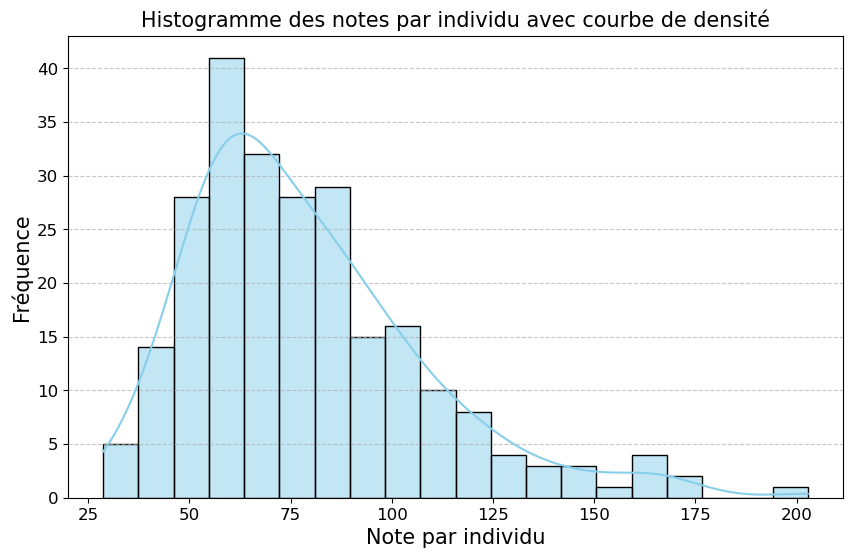

In [57]:
import matplotlib.pyplot as plt

# Créer un histogramme des notes par individu
import seaborn as sns
import matplotlib.pyplot as plt

# Créer un histogramme des notes par individu avec une courbe de densité
plt.figure(figsize=(10, 6))
sns.histplot(df['Note/n'], bins=20, kde=True, color='skyblue', edgecolor='black')  
plt.xlabel("Note par individu", fontsize=15)
plt.ylabel("Fréquence", fontsize=15)
plt.title("Histogramme des notes par individu avec courbe de densité", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

La distribution des notes de ce restaurant est unimodale, caractérisée par un seul pic ou mode. Cette derniere semble asymétrique et étalée vers la droite, avec son centre autour de 72 euros. La majorité des données se situent entre 28 et 175 euros. Cependant, des valeurs aberrantes sont observées, signalant quelques notes exceptionnellement élevées et contribuant à l'étalement en question.

**Comparaison des notes par individu selon le repas**

In [22]:
# Statistiques descriptives des notes par individu selon le repas
statistiques_notes_par_repas = df.groupby('Repas')['Note/n'].describe()

# Affichage des statistiques
print(statistiques_notes_par_repas)


          count       mean        std    min      25%     50%     75%     max
Repas                                                                        
Déjeuner   68.0  73.153750  23.737429  37.55  57.1000  67.100  83.925  163.40
Dîner     176.0  81.095597  30.756609  28.75  58.4875  75.125  97.650  202.75


 *Histogramme des notes par individu en fonction du repas (Dîner ou Déjeuner)*

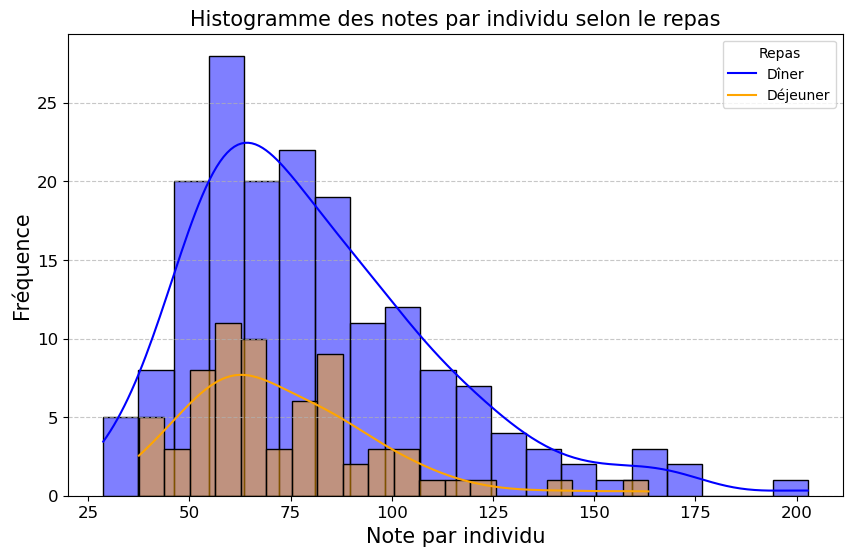

In [58]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['Repas'] == 'Dîner'], x='Note/n', bins=20, kde=True, color='blue', edgecolor='black', label='Dîner')
sns.histplot(data=df[df['Repas'] == 'Déjeuner'], x='Note/n', bins=20, kde=True, color='orange', edgecolor='black', label='Déjeuner')
plt.xlabel("Note par individu", fontsize=15)
plt.ylabel("Fréquence", fontsize=15)
plt.title("Histogramme des notes par individu selon le repas", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Repas', labels=['Dîner', 'Déjeuner']) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Les deux distributions, que ce soit pour le déjeuner ou le dîner, ne semblent pas suivre une distribution normale et montrent une tendance à s'étaler vers la droite. Il est à noter que la distribution du déjeuner est relativement plus aplatie par rapport à celle du dîner. Ce résultat est confirmé par l'analyse précedente indiquant ainsi la superiorité des notes du dîner comparant à celles du déjeuner.

*Boxplot des notes par individu selon le repas*

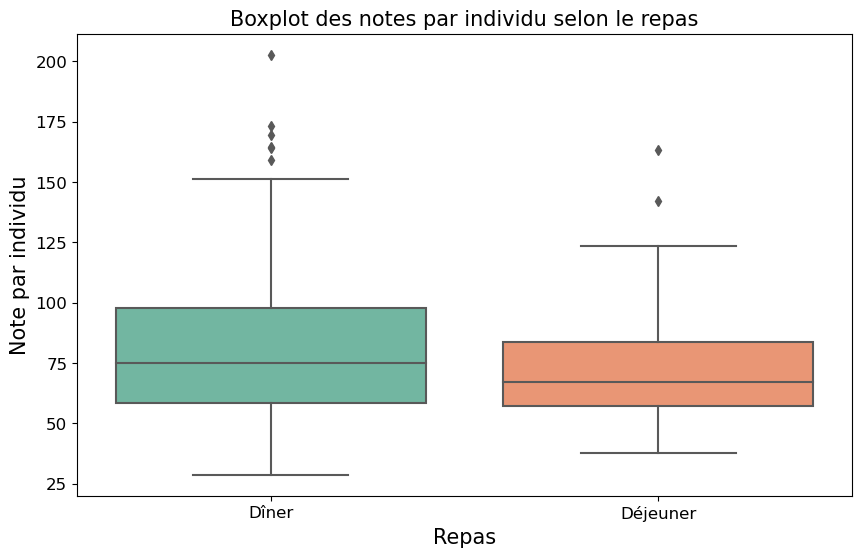

In [56]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Repas', y='Note/n', palette='Set2')
plt.xlabel("Repas", fontsize=15)
plt.ylabel("Note par individu", fontsize=15)
plt.title("Boxplot des notes par individu selon le repas", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

 En moyenne, les notes semblent légèrement plus élevées pour le dîner (81.10 euros) par rapport à celles pour le  déjeuner (73.15 euros). La médiane montre une tendance vers des montants plus élevés lors du dîner (75.13 euros) par rapport au déjeuner (67.10 euros). De plus il semble y avoir des variations dans les montants facturés en fonction du repas, avec une tendance vers des montants plus élevés lors des dîners.

In [78]:
from scipy.stats import f_oneway

# Séparation des données en deux groupes selon le repas
dejeuner = df[df['Repas'] == 'Déjeuner']['Note/n']
diner = df[df['Repas'] == 'Dîner']['Note/n']

# Test d'ANOVA
statistic, p_value = f_oneway(dejeuner, diner)
statistic, p_value
# Affichez les résultats
print("Statistique de test ANOVA :", statistic)
print("P-valeur :", p_value)


Statistique de test ANOVA : 3.6826430826777177
P-valeur : 0.056157836271520996


Comme discuté precedement,intuitivement il semblait y avoir des variations dans les montants facturés en fonction du repas, avec une tendance vers des montants plus élevés lors des dîners. cette  différence est démontrée par des tests appropriés, indiquant une variation dans les notes par individu, qui est intrinsèquement liée au type de repas (déjeuner ou dîner) au restaurant. En d'autres termes, le choix du repas semble jouer un rôle significatif dans la note à payer par individu.

**Comparaison des notes par individu selon le genre**

In [23]:
# Statistiques descriptives des notes par individu selon le genre
statistiques_notes_par_Genre = df.groupby('Genre')['Note/n'].describe()

# Affichage des statistiques
print(statistiques_notes_par_Genre)



       count       mean        std        min        25%   50%      75%  \
Genre                                                                     
Femme   87.0  74.639176  24.615186  28.750000  56.825000  67.1  87.2125   
Homme  157.0  81.233577  31.199120  34.466667  58.633333  76.0  96.8250   

              max  
Genre              
Femme  147.666667  
Homme  202.750000  


 *Histogramme des notes par individu en fonction du Genre*

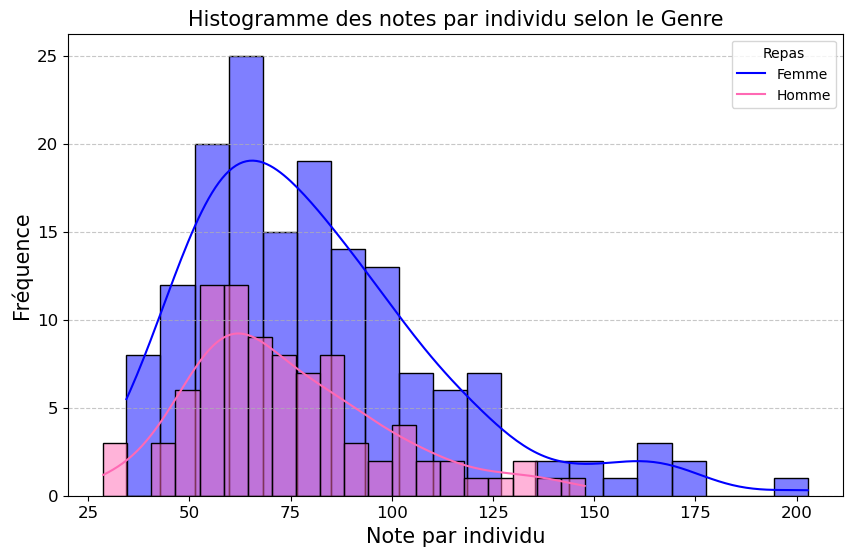

In [59]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['Genre'] == 'Homme'], x='Note/n', bins=20, kde=True, color='blue', edgecolor='black', label='Homme')
sns.histplot(data=df[df['Genre'] == 'Femme'], x='Note/n', bins=20, kde=True, color='hotpink', edgecolor='black', label='Femme')
plt.xlabel("Note par individu", fontsize=15)
plt.ylabel("Fréquence", fontsize=15)
plt.title("Histogramme des notes par individu selon le Genre", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Repas', labels=['Femme', 'Homme']) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

La distribution des notes par individu entre les genres homme et femme ne semble pas suivre une distribution normale. On observe des valeurs de notes plus élevées chez les hommes que chez les femmes.

*Boxplot des notes par individu selon le Genre*

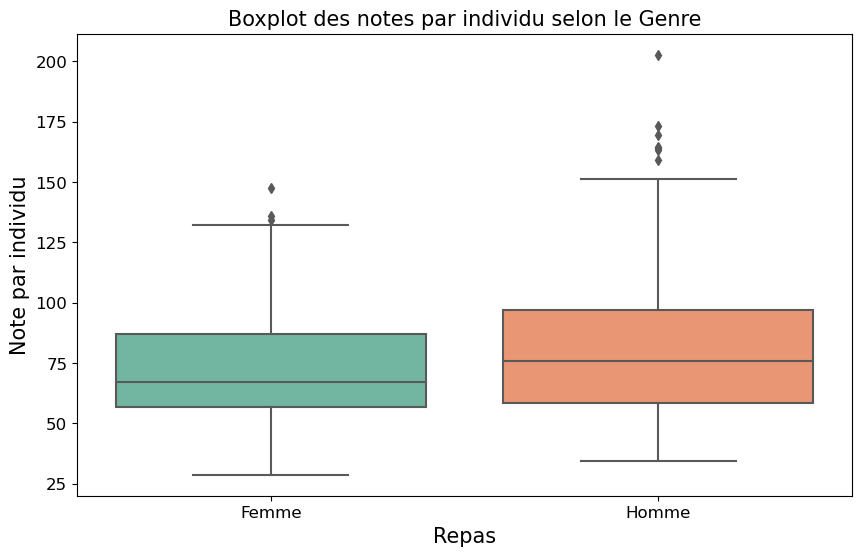

In [24]:
# Boxplot pour la variable 'Note/n' en fonction du genre

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Genre', y='Note/n', palette='Set2')
plt.xlabel("Repas", fontsize=15)
plt.ylabel("Note par individu", fontsize=15)
plt.title("Boxplot des notes par individu selon le Genre", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Bien que le genre ne semble pas fournir d'informations pertinentes pour notre analyse, l'examen de cette figure révèle une dispersion notable en fonction du genre avec une mediane importante chez les hommes que chez les femmes.De plus, la dispersion des notes, illustrée par la taille des boîtes et la présence de valeurs aberrantes, varie entre les genres.

In [76]:
import scipy.stats as stats

notes_homme = df[df['Genre'] == 'Homme']['Note/n']
notes_femme = df[df['Genre'] == 'Femme']['Note/n']

# Effectuez le test d'ANOVA
statistic, p_value = stats.f_oneway(notes_homme, notes_femme)

# Affichez les résultats
print("Statistique de test ANOVA :", statistic)
print("P-valeur :", p_value)




Statistique de test ANOVA : 2.8884074478305775
P-valeur : 0.09050402022018839



La relation entre le genre et la note par individu n'a pas été statistiquement validée. En d'autres termes, la différence observée dans les notes par individu entre les genres n'est pas significative d'un point de vue statistique.En conséquence, le genre n'a pas d'effet discernable sur la note par individu dans notre cas.

**Relation entre notes par individu et les jours**

*Boxplot des notes par individu en fonction du jour*

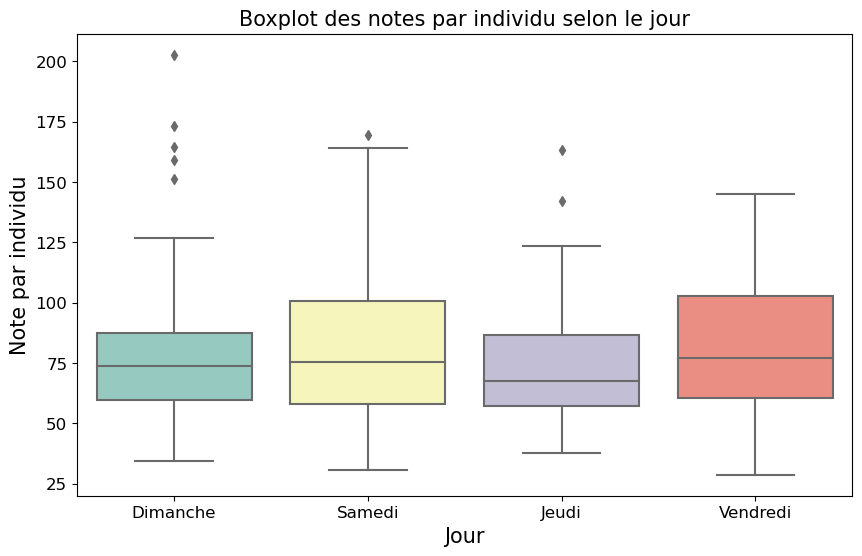

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Jour', y='Note/n', palette='Set3')
plt.xlabel("Jour", fontsize=15)
plt.ylabel("Note par individu", fontsize=15)
plt.title("Boxplot des notes par individu selon le jour", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Les statistiques des notes par jour indiquent des variations importantes dans les dépenses moyennes par individu. Le samedi se démarque avec les montants les plus élevés (moyenne de 81.87 euros), suivi du dimanche (moyenne de 78.84 euros). Le jeudi présente des dépenses légèrement inférieures (moyenne de 73.91 euros), tandis que le vendredi montre une distribution similaire au samedi, bien que moins accentuée (moyenne de 81.33 euros). Ces résultats suggèrent des tendances distinctes de dépenses selon les jours de la semaine, avec le week-end associé à des montants plus importants.

In [35]:
from scipy.stats import f_oneway

# Séparation des données par jour
notes_jour = [df['Note/n'][df['Jour'] == jour] for jour in df['Jour'].unique()]

# Test de l'ANOVA
statistique, p_valeur = f_oneway(*notes_jour)

# Affichage des résultats
print("Statistique de l'ANOVA :", statistique)
print("P-valeur :", p_valeur)


Statistique de l'ANOVA : 0.9408285492811297
P-valeur : 0.4215532437274355


il n'y a pas de différence significative en termes de jours par rapport aux notes par individu. En d'autres termes, les variations observées dans les notes par jour ne sont pas statistiquement significatives.

***Nuage de points de la relation entre la note par individu et le pourboirepar individu selon le repas***

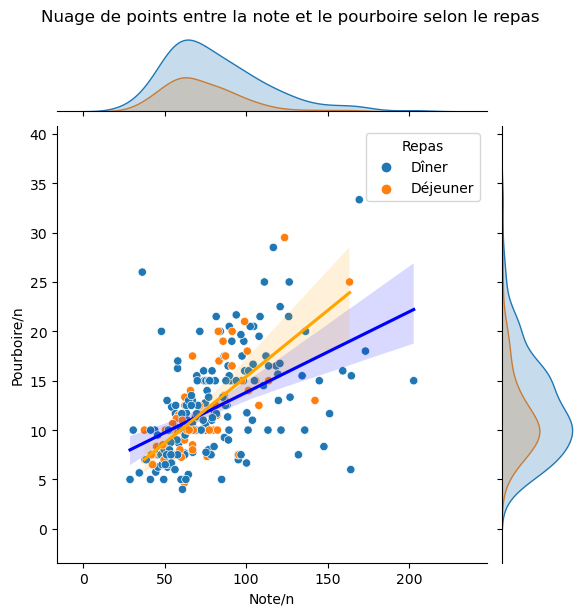

In [41]:
# Nuage de points avec hue pour distinguer le repas
sns.jointplot(x="Note/n", y="Pourboire/n", data=df, hue="Repas")

# Ajout des droites de régression
sns.regplot(x=df[df['Repas'] == 'Dîner']['Note/n'], y=df[df['Repas'] == 'Dîner']['Pourboire/n'], scatter=False, color='blue')
sns.regplot(x=df[df['Repas'] == 'Déjeuner']['Note/n'], y=df[df['Repas'] == 'Déjeuner']['Pourboire/n'], scatter=False, color='orange')

# Titre du graphique
plt.suptitle("Nuage de points entre la note et le pourboire selon le repas", y=1.02)

# Affichage du graphique
plt.show()


Ce nuage de points illustre la relation entre les notes par individu et les pourboires par individu en fonction du repas, comme indiqué par les deux droites distinctes pour le déjeuner et le dîner. Les deux droites convergent vers une conclusion similaire : à mesure que la note par individu augmente, le pourboire par individu augmente également. Cependant, une différence notable entre les deux repas est observée. Le dîner génère apparemment des notes plus élevées, entraînant par conséquent des pourboires plus élevés par individu par rapport au déjeuner.

***Nuage de points de la relation entre la note par individu et le pourboirepar individu selon le Jour***

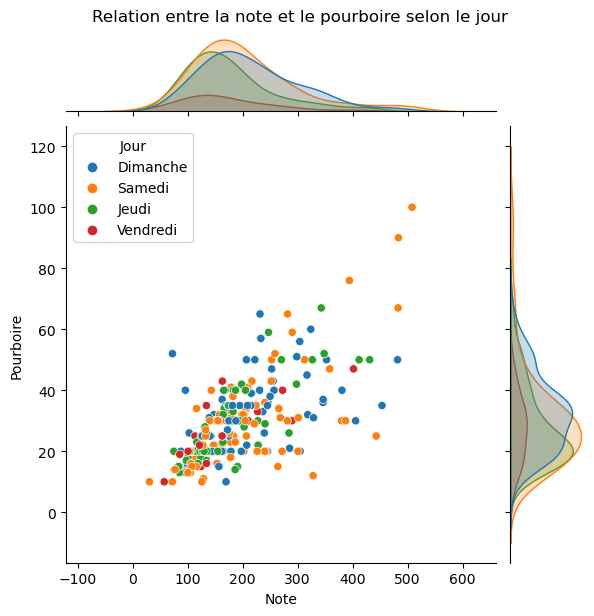

In [84]:
sns.jointplot(x="Note", y='Pourboire',data=df,hue="Jour")

plt.suptitle("Relation entre la note et le pourboire selon le jour", y=1.02)
plt.show()

On observe que le samedi se distingue en enregistrant davantage de notes élevées ainsi que de montants de pourboire par individu comparé aux autres jours de la semaine.







***Un diagramme en barre du nombre de personnes selon le repas***

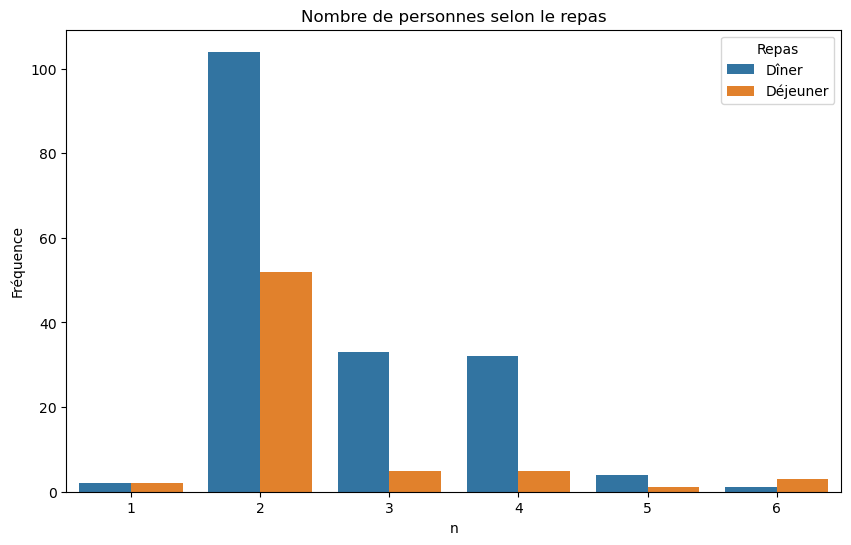

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Diagramme en barre du nombre de personnes selon le repas avec les fréquences
plt.figure(figsize=(10, 6))
sns.countplot(x='n', hue='Repas', data=df)
plt.title('Nombre de personnes selon le repas')
plt.xlabel('n')
plt.ylabel('Fréquence')
plt.show()


D'après l'observation du graphique, il apparaît que, pour une seule personne, les proportions accordées aux repas du dîner et du déjeuner sont équivalentes. En revanche, pour les groupes de 2, 3, 4, et 5 personnes, la proportion attribuée au dîner est plus importante que celle du déjeuner. Inversement, pour les groupes de 6 personnes, il semble que la proportion du déjeuner soit légèrement plus prononcée que celle du dîner.

**Relation entre Note par individu et le Pourboire par individu**

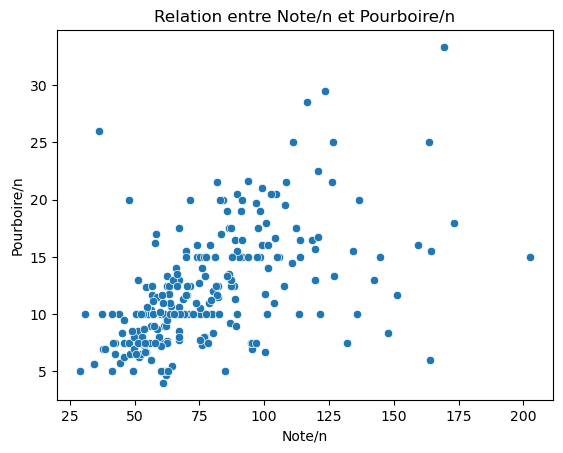

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer un nuage de points
sns.scatterplot(x='Note/n', y='Pourboire/n', data=df)
plt.title('Relation entre Note/n et Pourboire/n')
plt.show()


Le nuage de points montre que le pourboirepar individu augmente en même temps que les notes payées par individu. Les notes à gauche du graphique enregistrent les plus petits pourboires versés, et vice et versa.

In [61]:
# Calculer la corrélation
correlation = df['Note/n'].corr(df['Pourboire/n'])
print(f'Corrélation entre Note/n et Pourboire/n : {correlation}')


Corrélation entre Note/n et Pourboire/n : 0.5380123705961638


La corrélation entre la variable 'Note/n' (représentant la note par individu) et 'Pourboire/n' (représentant le pourboire par individu) est de 0.54, indiquant une relation positive modérée entre les deux. Cela suggère que, en moyenne, des notes plus élevées sont associées à des pourboires plus élevés. Cependant, la corrélation n'est pas très forte, ce qui implique que d'autres facteurs peuvent également influencer la variation des pourboires.

**Relation entre Repas et Jours**

In [63]:
tab2=pd.crosstab(df['Repas'], df["Jour"])
tab2

Jour,Dimanche,Jeudi,Samedi,Vendredi
Repas,,,,
Déjeuner,0,61,0,7
Dîner,77,0,87,12


In [64]:
tab2=pd.crosstab(df['Repas'], df["Jour"],normalize='index')
tab2

Jour,Dimanche,Jeudi,Samedi,Vendredi
Repas,,,,
Déjeuner,0.0000,0.897059,0.000000,0.102941
Dîner,0.4375,0.000000,0.494318,0.068182


In [65]:
round(100*tab2,2)

Jour,Dimanche,Jeudi,Samedi,Vendredi
Repas,,,,
Déjeuner,0.00,89.71,0.00,10.29
Dîner,43.75,0.00,49.43,6.82



On observe que le déjeuner est préféré le plus souvent les jeudis, constituant près de 90% des choix ce jour-là. En revanche, le dimanche et le samedi, le déjeuner est quasiment pas choisi. Pour le dîner, le choix est plus équilibré, avec des préférences notables le samedi (49.43%) et le dimanche (43.75%). Ces données offrent un aperçu des habitudes de choix entre le déjeuner et le dîner en fonction des jours de la semaine.


In [67]:
#Test d'indépendance
from scipy.stats import chi2_contingency
chi2_contingency(tab2)


Chi2ContingencyResult(statistic=1.8359375, pvalue=0.6071459325605357, dof=3, expected_freq=array([[0.21875   , 0.44852941, 0.24715909, 0.0855615 ],
       [0.21875   , 0.44852941, 0.24715909, 0.0855615 ]]))

Il apparaît que le choix entre le déjeuner et le dîner ne dépend pas significativement du jour de la semaine dans notre échantillon. Les analyses suggèrent une indépendance statistique entre ces deux variables.

**Relation entre pourboire par individu et repas**

In [72]:
# Statistiques descriptives des notes par individu selon le repas
statistiques_pourboire_par_repas = df.groupby('Repas')['Pourboire/n'].describe()

# Affichage des statistiques
print(statistiques_pourboire_par_repas)


          count       mean       std       min       25%   50%     75%  \
Repas                                                                    
Déjeuner   68.0  11.805147  4.507425  4.666667  9.750000  10.0  13.375   
Dîner     176.0  12.274811  5.085720  4.000000  8.333333  11.5  15.000   

                max  
Repas                
Déjeuner  29.500000  
Dîner     33.333333  


*Boxplot des pourboires par individu selon le repas*

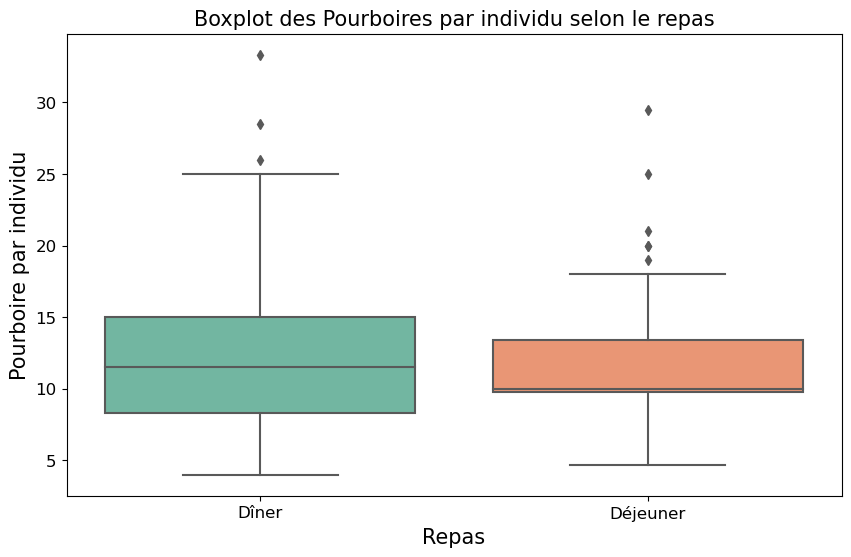

In [74]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Repas', y='Pourboire/n', palette='Set2')
plt.xlabel("Repas", fontsize=15)
plt.ylabel("Pourboire par individu", fontsize=15)
plt.title("Boxplot des Pourboires par individu selon le repas", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Le boxplot comparant les pourboires entre le déjeuner et le dîner indique que, pour le déjeuner, la moitié des pourboires se situe entre environ 9.75 et 13.38 euros, avec une médiane à 10 euros. Pour le dîner, la plage est de 8.33 à 15 euros, avec une médiane à 11.5 euros. En moyenne, les pourboires semblent légèrement plus élevés pour le dîner, mais la dispersion des montants est également plus grande.

In [79]:
from scipy.stats import f_oneway

# Séparation des données en deux groupes selon le repas
dejeuner = df[df['Repas'] == 'Déjeuner']['Pourboire/n']
diner = df[df['Repas'] == 'Dîner']['Pourboire/n']

# Test d'ANOVA
statistic, p_value = f_oneway(dejeuner, diner)
statistic, p_value
# Affichez les résultats
print("Statistique de test ANOVA :", statistic)
print("P-valeur :", p_value)


Statistique de test ANOVA : 0.44472134205267483
P-valeur : 0.5054877448006933



En testant la relation statistiquement il semble que, généralement on est devant une absence de différence significative entre les groupes comparés.En d'autres termes, il n'y a pas suffisamment de preuves dans les données pour conclure que le choix entre le déjeuner et le dîner a un impact significatif sur le montant du pourboire par personne.

**Relation entre pourboire par individu et jours**

In [80]:
# Statistiques descriptives des notes par individu selon le jour
statistiques_pourboire_par_Jour = df.groupby('Jour')['Pourboire/n'].describe()

# Affichage des statistiques
print(statistiques_pourboire_par_Jour)

          count       mean       std       min        25%        50%  \
Jour                                                                   
Dimanche   77.0  12.180087  4.738164  4.000000   9.000000  11.666667   
Jeudi      61.0  11.717213  4.572444  4.666667   9.000000  10.000000   
Samedi     87.0  12.158046  5.399332  5.000000   7.708333  10.000000   
Vendredi   19.0  13.302632  4.677502  5.000000  10.000000  12.500000   

                75%        max  
Jour                            
Dimanche  15.000000  28.500000  
Jeudi     13.333333  29.500000  
Samedi    15.583333  33.333333  
Vendredi  17.000000  21.500000  


*Boxplot des pourboires par individu selon le Jour*

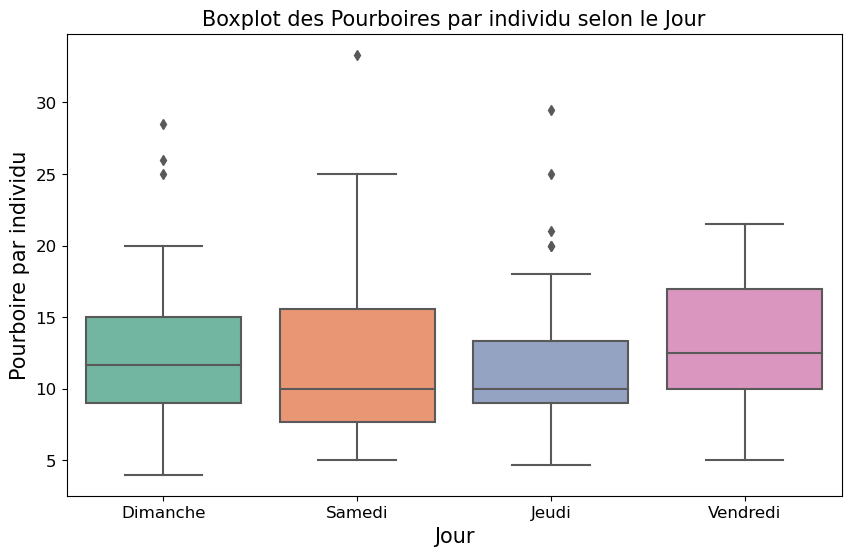

In [82]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Jour', y='Pourboire/n', palette='Set2')
plt.xlabel("Jour", fontsize=15)
plt.ylabel("Pourboire par individu", fontsize=15)
plt.title("Boxplot des Pourboires par individu selon le Jour", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Le boxplot comparant les médianes des pourboires par individu pour chaque jour de la semaine indique que la médiane est relativement similaire entre dimanche, jeudi et samedi, avec des valeurs autour de 11.67, 10, et 10 euros respectivement. Cependant, le vendredi présente une médiane plus élevée, atteignant environ 12.5 euros. 

In [83]:
from scipy.stats import f_oneway

# Séparation des données par jour
Pourboire_jour = [df['Pourboire/n'][df['Jour'] == jour] for jour in df['Jour'].unique()]

# Test de l'ANOVA
statistique, p_valeur = f_oneway(*Pourboire_jour)

# Affichage des résultats
print("Statistique de l'ANOVA :", statistique)
print("P-valeur :", p_valeur)


Statistique de l'ANOVA : 0.5013573152479751
P-valeur : 0.6816945529884446


Aussi similaire aux relations précédentes, la relation n'est pas approuvée statistiquement. Par conséquent, on ne peut confirmer que le choix du jour a un impact significatif sur le montant du pourboire par personne.

# Conclusion


En synthèse, notre analyse met en lumière plusieurs aspects intéressants. Tout d'abord, le choix entre le déjeuner et le dîner a une influence significative sur le montant des notes par personne, démontrant ainsi une dépendance statistiquement établie. En revanche, le genre et le jour de la semaine ne semblent pas exercer d'effet significatif sur le montant des notes par personne, selon nos tests statistiques.

Par ailleurs, une corrélation positive significative est observée entre les notes individuelles et les pourboires par individu, indiquant que ceux qui paye des notes plus élevées ont tendance à accorder également des pourboires plus importantes. Cependant, aucune relation statistiquement significative n'est établie entre les pourboires par personne et le choix du repas ou le jour de la semaine.

**Il est important de noter que la présence de valeurs aberrantes dans notre base de données pourrait potentiellement influencer nos résultats. L'exclusion de ces valeurs pourrait conduire à des conclusions différentes.**